# Data manipulations

A matrix transformation is a matrix multiplication between a transformation matrix M and a data matrix D that gives you a manipulated data matrix D' as output.

We can use matrix multiplications to transform our data (our data points, represented as feature vectors).

## Load and look at our data

Let's load the used car data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

data = np.array(np.genfromtxt('data/vehiclesNumeric.csv', delimiter=',', skip_header=1, dtype=int, encoding="utf-8", usecols=[1,2,3]))  

# get a pandas dataframe for plotting
df = pd.DataFrame(data, columns=["price", "year", "odometer"])

Let's get some **summary statistics**.

In [6]:
def getSummaryStatistics(data):
    print("min, max, mean, std per variable")
    print(data.min())
angelgomez05041@outlook.com
def getShapeType(data):
    print("shape")
    return (data.shape, data.dtype)

print(getSummaryStatistics(data))
print(getShapeType(data))

min, max, mean, std per variable
0
              0            1             2
0      0.000000  1999.000000  0.000000e+00
1  55000.000000  2021.000000  9.999999e+06
2   7978.281507  2012.381887  1.124405e+05
3   5542.906703     3.997048  2.546163e+05
shape
((3158, 3), dtype('int64'))


Let's plot the used car data.

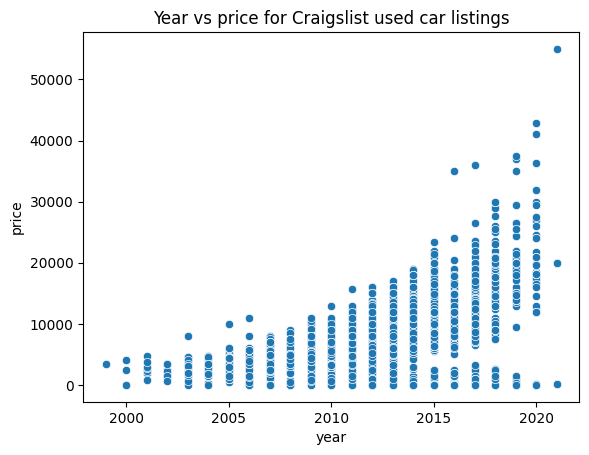

In [3]:
def plot2d(data):
    sns.scatterplot(pd.DataFrame(data[:, [0, 1]], columns=["price", "year"]), x="year", y="price").set(title="Year vs price for Craigslist used car listings")
    
plot2d(data)

32 bit float or 62 bit float only

## Review. **if subtracitng by mimnimum make x and y both your minimums**

A translation matrix for two-variable data looks like:
$$\begin{pmatrix} 1 & 0 & x \\ 0 & 1 & y \\ 0 & 0 & 1\end{pmatrix}$$
where $x, y$ are the amount by which you want the $0th$ and $1st$ variables translated, respectively.

A scaling matrix for two-variable data looks like:
$$\begin{pmatrix} x & 0 \\ 0 & y \end{pmatrix}$$
where $x, y$ are the amount by which you want the $0th$ and $1st$ variables scaled, respectively. 

$$\begin{pmatrix} 1/99999... & 0 \\ 0 & 1/9999.... \end{pmatrix}$$
where $x, y$ are the amount by which you want the $0th$ and $1st$ variables scaled, respectively. 

You can combine them if you add a third column to the scaling matrix with all 0s except for the last item (a 1):
$$\begin{pmatrix} x & 0 & 0 \\ 0 & y & 0 \\ 0 & 0 & 1 \end{pmatrix}$$

**red is scale**
**blue is translating**

local max min localization- subtract the miinimum of everything and divide by the maximum of x

## Global max-min normalization

Visualization and modeling will be much easier if the ranges of my data are more similar. Let's just transform our data to be in the range [0, 1].

Here are two ways to get there.

First, let's try **global (max-min) normalization**.

Here is how that works:
1. subtract the global minimum from each datapoint. **translate**
2. divide by the global range (max - min)

The transformation matrix for two variables looks like:
$$\begin{pmatrix} \frac{1}{(max(data)-min(data))} & 0 & -min(data) \\ 0 & \frac{1}{(max(data)-min(data))} & -min(data) \\ 0 & 0 & 1\end{pmatrix}$$

What does this look like in terms of scaling and translation?

What does the transformation matrix look like, specifically, for our data?

In [ ]:
# subtract the global minimum from each datapoint
translateTransform = np.eye(data.shape[1], dtype=float)
for i in range(data.shape[1]+1): #3 0 1 2
    translateTransform[i, 2] = data.min()
print("translateTransform")
print(translateTransform)
#make last one be 1
# divide by the global range
scaleTransform = np.eye(data.shape[1]+1)
scaleTransform[0, 0] = #1/max
scaleTransform[1, 1] = #1/max
scaleTransform[2, 2] = 1
print("scaleTransform")
print(scaleTransform)

# when we do a series of transformations, first we multiply the smaller transformation matrices, and only at the end the result of that with the larger data matrix (more efficient!)
totalTransform = scaleTransform@translateTransform
print("transformMatrix")
print("shape\n", getShapeType(totalTransform))
print(totalTransform)


Add homogenized coordinate so we can translate!

In [ ]:
# How do we append a whole column?
homogenizedData = np.append(data, np.array([np.ones(data.shape[0], dtype=int)]).T, axis=1)
print("homogenized data")
print(getSummaryStatistics(homogenizedData))
print(getShapeType(homogenizedData))

In [ ]:
transformedData = (totalTransform@homogenizedData.T).T
print("after global normalization, transformedData")
print(getSummaryStatistics(transformedData))
print(getShapeType(transformedData))
plot2d(transformedData)

What seems weird to you about this process? What seems solid?

## Per-variable max-min normalization

Here's another way. Let's try **max-min normalization per variable**.

The transformation matrix for two variables, $x$ and $y$, looks like:
$$\begin{pmatrix} \frac{1}{(max(x)-min(x))} & 0 & -min(x) \\ 0 & \frac{1}{(max(y)-min(y))} & -min(y) \\ 0 & 0 & 1\end{pmatrix}$$

What does this look like in terms of scaling and translation?

What does the transformation matrix look like for our data, specifically?
-min/(max-min)

In [ ]:
print("before per variable normalization, homogenizedData")
print(getSummaryStatistics(homogenizedData))

translateTransform = np.eye(homogenizedData.shape[1], dtype=float)
translateTransform[:, 2] = ??
scaleTransform = np.eye(homogenizedData.shape[1], dtype=float)

totalTransform = scaleTransform@translateTransform
print("transformMatrix")
print(totalTransform)

transformedData = (totalTransform @ homogenizedData.T).T
print("after per variable normalization, transformedData")
print(getSummaryStatistics(transformedData))
print(getShapeType(transformedData))
plot2d(transformedData)

What is good about this way of normalizing our data? What do we not like?

## Challenges

* What if I want to *mean center* my data, or make the mean point zero?
* What if I want to *mean center* and normalize so that the data's range is [-1, 1]?


## Visualizations

There are some nice web-based visualizers that show you how scaling and rotation work (rotation comes next week!). Here is one where you can upload your own picture:
* https://web.ma.utexas.edu/users/ysulyma/matrix/

And here is one that walks through the matrix multiply with you:
* https://www.cs.usfca.edu/~galles/visualization/RotateScale3D.html
* https://www.cs.usfca.edu/~galles/visualization/RotateScale2D.html

And finally, here is an Observable notebook that also reviews the matrix multiply:
* https://observablehq.com/@noonat/transformation-matrices

Happy playing!

## Resources

* https://staff.fnwi.uva.nl/r.vandenboomgaard/IPCV20162017/LectureNotes/MATH/homogenous.html
* https://www.informit.com/articles/article.aspx?p=2854376&seqNum=8
* https://towardsdatascience.com/normalization-techniques-in-python-using-numpy-b998aa81d754
* https://www.machinecurve.com/index.php/2020/11/19/how-to-normalize-or-standardize-a-dataset-in-python/